In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
input_text = au.read_txt_file_lines()
n_rows = len(input_text)

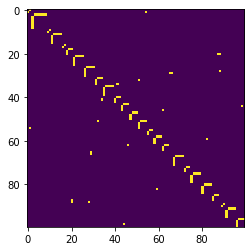

In [13]:
list_comps = []
for l in input_text:
    comps = l.split(':')
    assert len(comps) == 2
    comps = [comps[0]] + comps[1].split()
    comps = [x.strip() for x in comps]
    for c in comps:
        if c not in list_comps:
            list_comps.append(c)

n_comps = len(list_comps)
mat_connect = np.zeros((n_comps, n_comps), dtype=int)
for l in input_text:
    comps = l.split(':')
    assert len(comps) == 2
    start_comp = comps[0].strip()
    end_comps = [x.strip() for x in comps[1].split()]
    ind_start = list_comps.index(start_comp)
    for c in end_comps:
        ind_end = list_comps.index(c)
        mat_connect[ind_start, ind_end] = 1
        mat_connect[ind_end, ind_start] = 1

plt.imshow(mat_connect[:100, :100], interpolation='none')

- remove 3 components to disconnect matric into 2 groups

In [53]:
def check_connected(mat_connect, start_ind=0, nodes_skip=[]):
    queue_nodes = collections.deque([start_ind])
    set_visited_nodes = set()
    nodes_skip = set(nodes_skip)
    n_total = mat_connect.shape[0]# - len(nodes_skip)
    if len(nodes_skip) > 0:
        for x in nodes_skip:
            set_visited_nodes.add(x)
    ## juts work with inds 
    while len(queue_nodes) > 0:
        curr_node = queue_nodes.popleft()
        # print(curr_node)
        assert curr_node not in set_visited_nodes, curr_node
        set_visited_nodes.add(curr_node)
        connected_nodes = np.where(mat_connect[curr_node, :])[0]
        connected_nodes = set(connected_nodes).difference(set_visited_nodes)
        connected_nodes = [x for x in connected_nodes if x not in queue_nodes]
        queue_nodes.extend(connected_nodes)

    n_final = len(set_visited_nodes)
    if n_total == n_final:
        return True, None
    else:
        print(f'only {n_final}/{n_total} comps')
        return False, set_visited_nodes

In [54]:
# %timeit check_connected(mat_connect)

In [56]:
grade_nodes = np.sum(mat_connect, 0)
inds_nodes_sorted = np.argsort(grade_nodes)[::-1]  # large to small 
candidate_nodes = inds_nodes_sorted[:20]
for c1 in tqdm(candidate_nodes):
    for c2 in candidate_nodes:
        for c3 in candidate_nodes:
            if len(set([c1, c2, c3])) != 3:
                continue
            is_full, set_nodes = check_connected(mat_connect=mat_connect, nodes_skip=[c1, c2, c3])
            assert is_full, f'{c1} {c2} {c3}'
            

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [04:20<00:00, 13.03s/it]


In [47]:
len(set_nodes), len(list_comps)

(1568, 1568)